In [1]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp

c:\Users\LyuQi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

In [3]:
mols_gpu = cr.build_thermal_molecules_gpu(int(1e4), [25e-6, 25e-6, 25e-6])

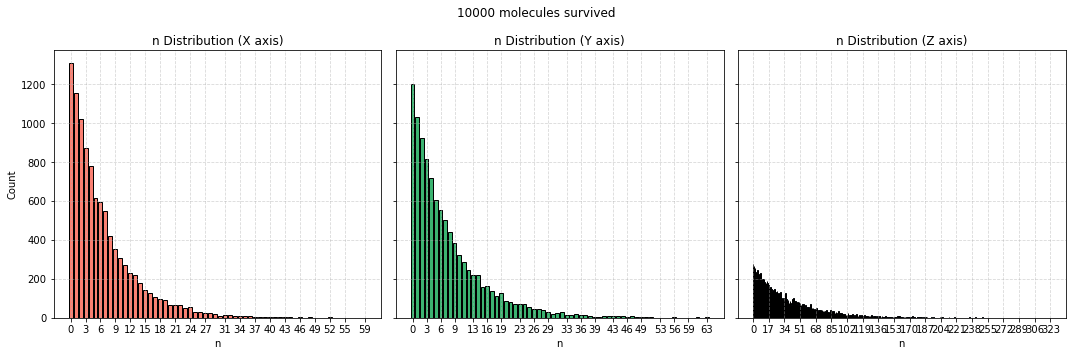

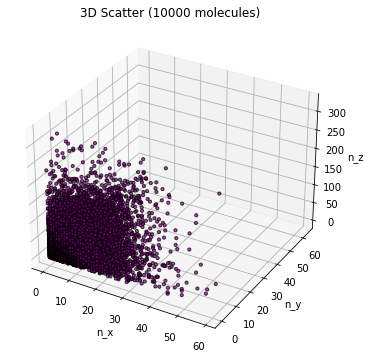

In [9]:
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)

In [4]:
mols_cpu = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], int(1e4))

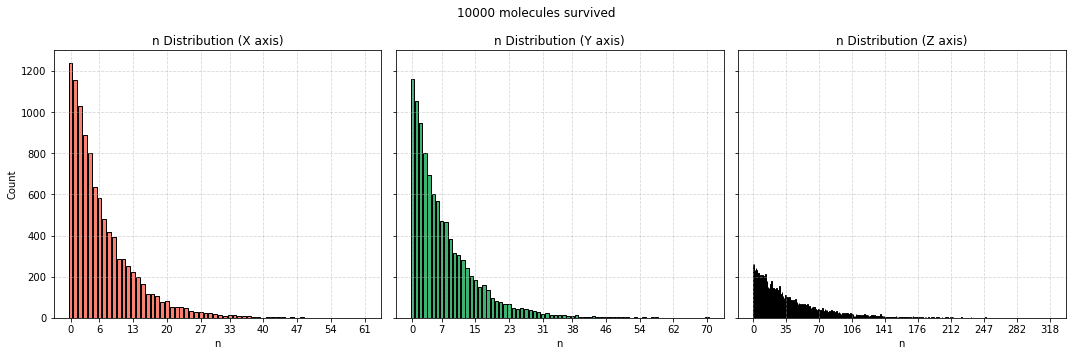

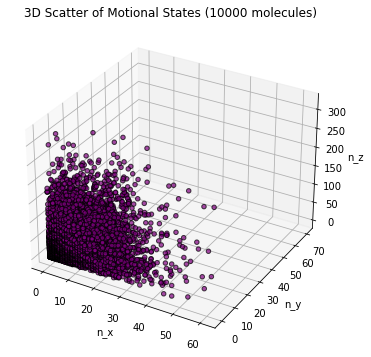

In [5]:
dist_cpu = RSC_sim.get_n_distribution(mols_cpu)

In [6]:
original_cpu = RSC_sim.get_original_sequence()

In [12]:
original_cpu[0]

[[0, -3, 7.563093425308762],
 [1, -3, 7.563093425308762],
 [0, -2, 7.563093425308762],
 [1, -2, 7.563093425308762]]

In [14]:
for _ in np.arange(10):
    res_cpu = RSC_sim.apply_raman_sequence(mols_cpu, original_cpu[0], max_workers=16)

Applying pulses to molecules: 100%|██████████| 10000/10000 [00:10<00:00, 935.64it/s]


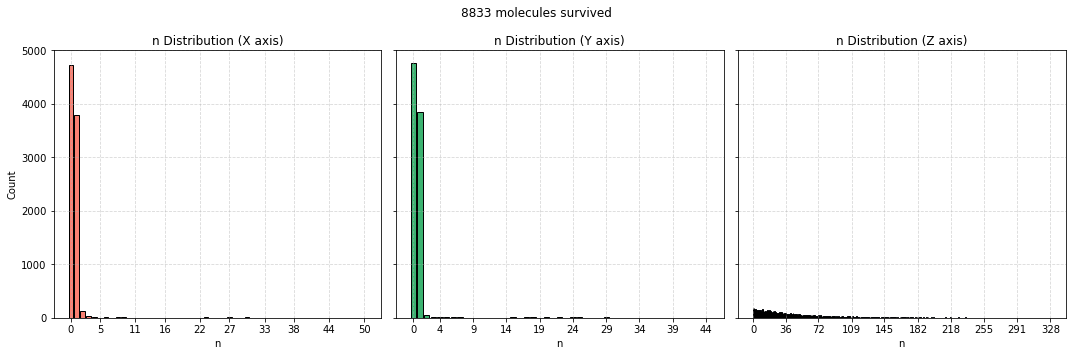

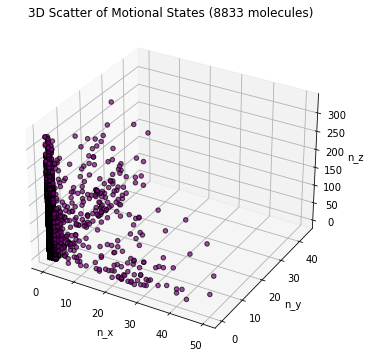

In [15]:
dist_cpu = RSC_sim.get_n_distribution(mols_cpu)

In [3]:
original_gpu = cr.get_original_sequences_gpu()
mols_gpu = cr.build_thermal_molecules_gpu(int(1e4), [25e-6, 25e-6, 25e-6])

### XY

In [4]:
for _ in np.arange(10):
    cr.raman_cool_with_pumping(mols_gpu, original_gpu[0], res, K_max=30, show_progress=True)

Raman pulses: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]


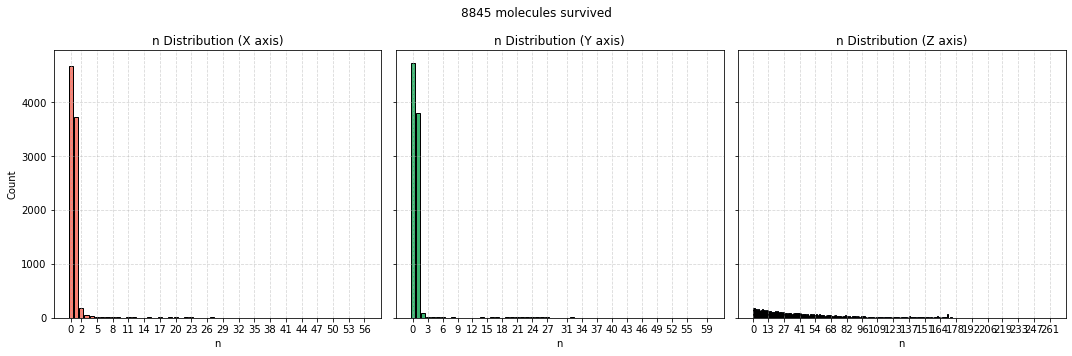

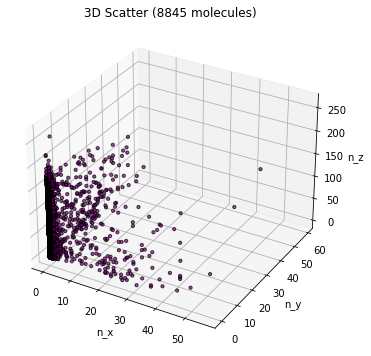

In [5]:
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)

#### Analysis and saving test

In [6]:
res = cr.bootstrap_stats_from_molecules(mols_gpu)

In [7]:
print(res['survival_rate_mean'])
print(res['mot_mean'])
print(res['mot_sem'])

0.8845
[ 0.90684002  0.93713963 50.06885246]
[0.00110751 0.00117898 0.01486357]


In [10]:
cr.save_molecules(mols_gpu, "test.npy")

[✓] Molecules saved to: C:\Users\LyuQi\Documents\optimize_sequence\benchmark\test.npy  (shape=(10000, 6))


In [11]:
mol_save = np.load("test.npy")

In [13]:
res = cr.bootstrap_stats_from_molecules(cp.asarray(mol_save))

In [14]:
print(res['survival_rate_mean'])
print(res['mot_mean'])
print(res['mot_sem'])

0.8858
[ 0.87852788  0.86994807 49.14472793]
[0.00104357 0.00110255 0.01587127]


### XYZ1

In [11]:
for _ in np.arange(5):
    cr.raman_cool_with_pumping(mols_gpu, original_gpu[1], res, K_max=30)

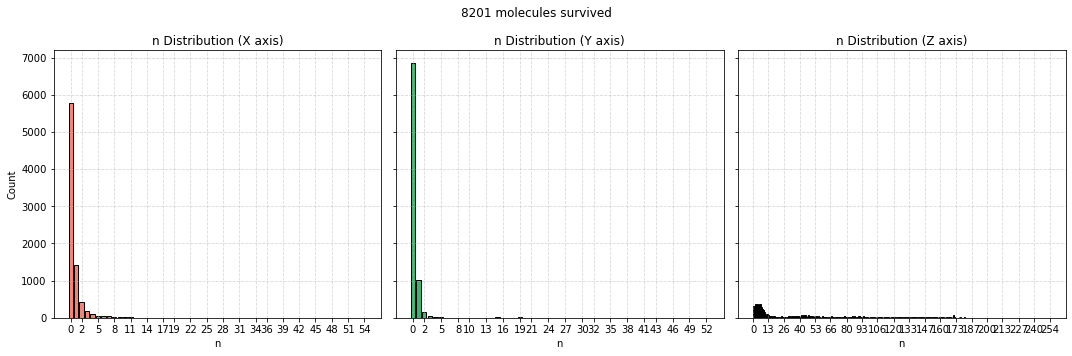

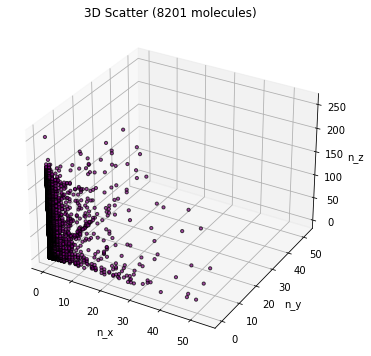

In [12]:
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)

### XYZ2

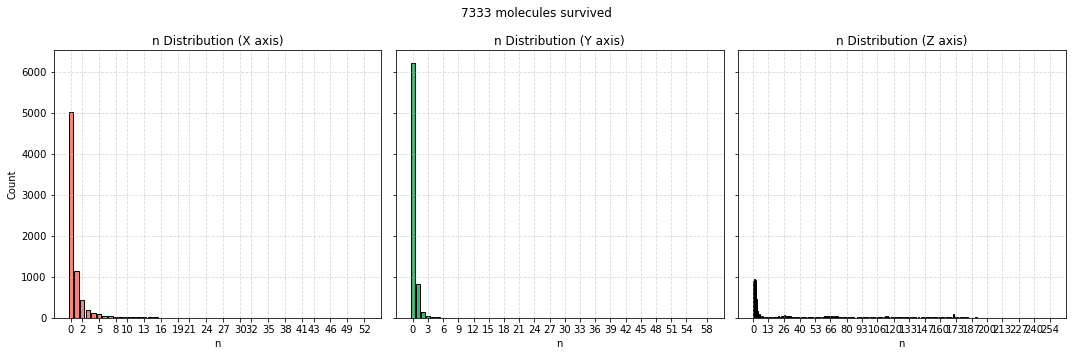

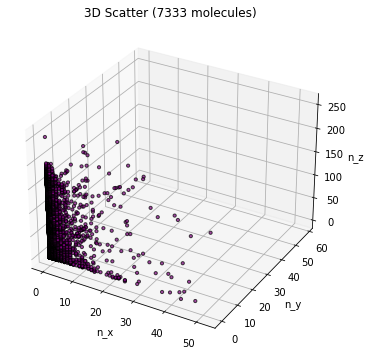

In [13]:
for _ in np.arange(5):
    cr.raman_cool_with_pumping(mols_gpu, original_gpu[2], res, K_max=30)
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)

### XYZ3

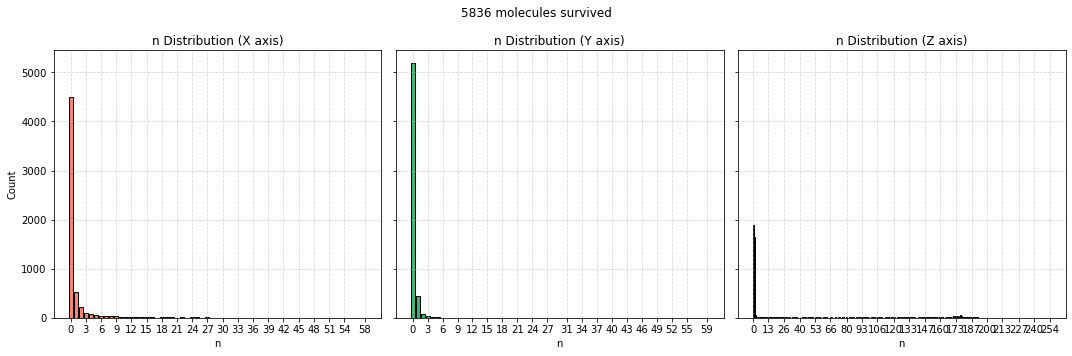

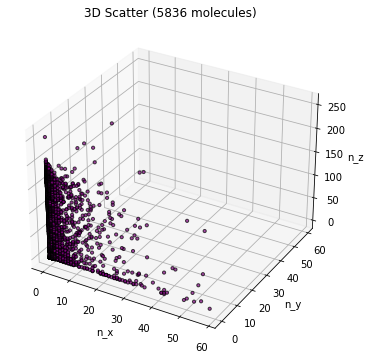

In [14]:
for _ in np.arange(10):
    cr.raman_cool_with_pumping(mols_gpu, original_gpu[3], res, K_max=30)
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)

### XYZ4

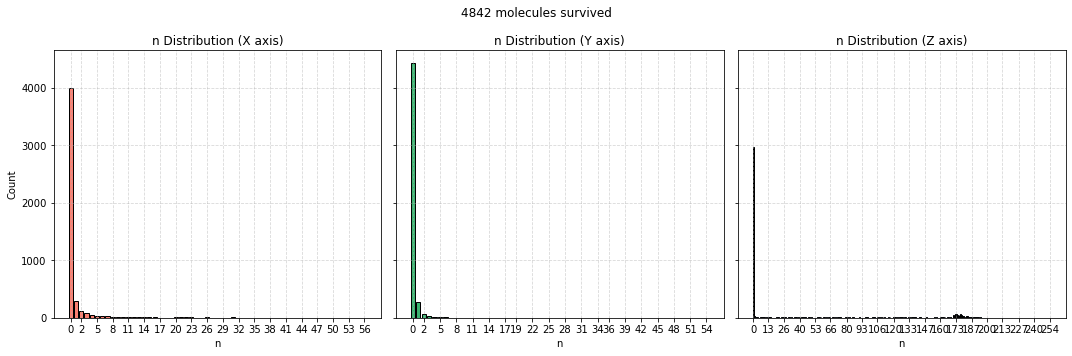

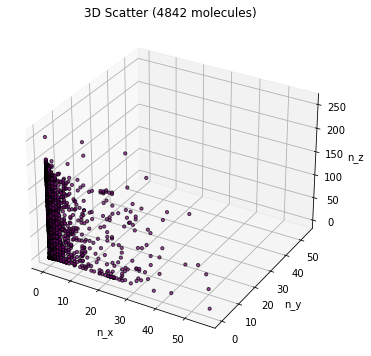

In [15]:
for _ in np.arange(10):
    cr.raman_cool_with_pumping(mols_gpu, original_gpu[4], res, K_max=30)
dist_gpu = cr.get_n_distribution_gpu(mols_gpu, max_bins=20)